In [2]:
import pandas as ps
import numpy as np
import cv2     # for capturing videos
import math   
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import shutil
from skvideo import io

# New version for video processing

In [56]:
video_dir = "cleaned_data_videos/cropped_data_auto"
out_image_dir = "cleaned_data_images"
CROSS_VAL_DIR = "cross_validation_data"

In [50]:
files = os.listdir(video_dir)
labs = [f[:3] for f in files]
print(np.unique(labs, return_counts=True))

(array(['Cov', 'Pne', 'Reg', 'pne'], dtype='<U3'), array([39, 10, 11,  4]))


### Make directories

In [49]:
# make directories:
if not os.path.exists(out_image_dir):
    os.makedirs(out_image_dir)
if not os.path.exists(CROSS_VAL_DIR):
    os.makedirs(CROSS_VAL_DIR)   
for mod in ["covid", "pneumonia", "regular"]: # viral
    if not os.path.exists(os.path.join(out_image_dir, mod)):
        os.makedirs(os.path.join(out_image_dir, mod))

## Videos to images - automatically select every x frame

Takes all videos from video_dir and writes the frames to out_image_dir

### prepare script

In [16]:
TAKE_CLASSES = ["covid", "pneumonia", "regular"]
TAKE_MODE = ["Linear", "Convex"]
FRAMERATE = 3 # saves automatically 2 frames per second
MAX_FRAMES = 30
POCUS_IMAGE_DIR = "../../data/pocus_images"
POCUS_VIDEO_DIR = "../../data/pocus_videos"
out_image_dir = "../../data/image_dataset"
if not os.path.exists(out_image_dir):
    os.makedirs(out_image_dir)  
for mod in TAKE_CLASSES:
    if not os.path.exists(os.path.join(out_image_dir, mod)):
        os.makedirs(os.path.join(out_image_dir, mod))

In [11]:
def label_to_dir(lab):
    if lab == "Cov":
        label = "covid"
    elif lab == "Pne" or lab == "pne":
        label = "pneumonia"
    elif lab == "Reg":
        label = "regular"
    elif lab == "Vir":
        label = "viral"
    else:
        raise ValueError("Wrong label! " + lab)
    return label # os.path.join(label, lab + "-")

In [17]:
# copy all images from pocus_images
for mode in TAKE_MODE:
    for fp in os.listdir(os.path.join(POCUS_IMAGE_DIR, mode)):
        if fp[-3:] in ["png", "jpg", "jpeg"]:
            label_dir = label_to_dir(fp[:3])
            if label_dir in TAKE_CLASSES:
                # print(os.path.join(POCUS_IMAGE_DIR, mode,fp), os.path.join(out_image_dir, label_dir))
                shutil.copy(os.path.join(POCUS_IMAGE_DIR, mode,fp), os.path.join(out_image_dir, label_dir))

In [20]:
for mode in TAKE_MODE:
    vid_files = os.listdir(os.path.join(POCUS_VIDEO_DIR, mode))
    for i in range(len(vid_files)):

        # skip non video files
        if vid_files[i][-3:].lower() not in ["mpeg", "gif", "mp4", "m4v", "avi", "mov"]:
            continue

        # define video path
        video_path = os.path.join(POCUS_VIDEO_DIR, mode, vid_files[i])
        # determine label
        label = label_to_dir(vid_files[i][:3])
        # determine out path based on label
        out_path = os.path.join(out_image_dir, label)

        # read and write if video
        cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
        frameRate = cap.get(5) #frame rate
        # num_frames = cap.get(7)
        every_x_image = int(frameRate/FRAMERATE)
        print(vid_files[i], "framerate", cap.get(5),"width", cap.get(3), "height", cap.get(4), "number frames:", cap.get(7))
        print("--> taking every ", every_x_image, "th image")
        x=1
        nr_selected = 0
        while cap.isOpened() and nr_selected<MAX_FRAMES:
            frameId = cap.get(1) #current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % every_x_image == 0):
                # storing the frames in a new folder named test_1
                filename = os.path.join(out_path, vid_files[i] +"_frame%d.jpg" % frameId)
                cv2.imwrite(filename, frame)
                nr_selected += 1
                print(filename)
        cap.release()

Vir_liftl_H1N1_case2_clip2.mp4 framerate 12.0 width 358.0 height 358.0 number frames: 36.0
--> taking every  4 th image
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame0.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame4.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame8.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame12.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame16.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame20.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame24.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame28.jpg
../../data/image_dataset/viral/Vir_liftl_H1N1_case2_clip2.mp4_frame32.jpg
Cov-Atlas-pleural.mp4 framerate 23.976023976023978 width 364.0 height 364.0 number frames: 77.0
--> taking every  7 th image
../../data/image_dataset/covid/Cov-Atlas-pleural.mp4_frame0.jpg
../../data/image_dataset/cov

../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame88.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame96.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame104.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame112.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame120.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame128.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame136.jpg
../../data/image_dataset/pneumonia/Pneu_prospective_file3.mp4_frame144.jpg
Pneu-Youtube-start20sec.mp4 framerate 50.0 width 1080.0 height 1080.0 number frames: 166.0
--> taking every  16 th image
../../data/image_dataset/pneumonia/Pneu-Youtube-start20sec.mp4_frame0.jpg
../../data/image_dataset/pneumonia/Pneu-Youtube-start20sec.mp4_frame16.jpg
../../data/image_dataset/pneumonia/Pneu-Youtube-start20sec.mp4_frame32.jpg
../../data/image_dataset/pneumonia/Pneu-Youtube-start20se

../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame0.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame10.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame20.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame30.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame40.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame50.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame60.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame70.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame80.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame90.jpg
../../data/image_dataset/regular/Reg-Youtube-Video_902_Lung_POCUS-left.mp4_frame100.jpg
../../data/image_dataset/regular/Reg-Youtub

## Previous version of video to images (no script)

In [19]:
# SET FRAMERATE
FRAMERATE = 3 # saves automatically 2 frames per second
MAX_FRAMES = 30

In [58]:
vid_files = os.listdir(video_dir)
for i in range(len(vid_files)):
    
    # skip unnecessary files
    if vid_files[i][0]==".":
        # DStore etc
        continue
    
    # define video path
    # print("video", vid_files[i], "number ",i, "out of ", len(vid_files))
    video_path = os.path.join(video_dir, vid_files[i])
    
    # determine label
    if vid_files[i][:3]=="Cov":
        label = "covid"
    elif vid_files[i][:3]=="Pne" or vid_files[i][:3]=="pne":
        label = "pneumonia"
    elif vid_files[i][:3]=="Reg":
        label = "regular"
    else:
        raise ValueError("Wrong label! "+ vid_files[i])
    out_path = os.path.join(out_image_dir, label)
    
    # copy if image
    if vid_files[i][-3:]=="jpg" or vid_files[i][-3:]=="png":
        shutil.copy(video_path, out_path)
        continue
    
    # read and write if video
    cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    # num_frames = cap.get(7)
    every_x_image = int(frameRate/FRAMERATE)
    print(vid_files[i], "framerate", cap.get(5),"width", cap.get(3), "height", cap.get(4), "number frames:", cap.get(7))
    print("--> taking every ", every_x_image, "th image")
    x=1
    nr_selected = 0
    while cap.isOpened() and nr_selected<MAX_FRAMES:
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % every_x_image == 0):
            # storing the frames in a new folder named test_1
            filename = os.path.join(out_path, vid_files[i] +"_frame%d.jpg" % frameId)
            cv2.imwrite(filename, frame)
            nr_selected += 1
            print(filename)
    cap.release()

Reg-Butterfly.mpeg framerate 25.0 width 490.0 height 536.0 number frames: 11.0
--> taking every  8 th image
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame0.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame1.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame2.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame3.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame4.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame5.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame6.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame7.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame8.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame9.jpg
cleaned_data_images/regular/Reg-Butterfly.mpeg_frame10.jpg


# Script to select frames manually from one video

In [1]:
# define video path (ONE VIDEO)
video_path = "cleaned_data_videos/cropped_data_manual/Reg-Butterfly.mp4"
# define where to save outputs
out_image_dir = "cleaned_data_images"
# how many frames do you want to check?
check_every = 2 # displays every second frame
out_name = "Reg-Butterfly.mp4"

In [ ]:
# make subdirectories if they don't exist
for mod in ["covid", "pneunomia", "regular"]:
    if not os.path.exists(os.path.join(out_image_dir, mod)):
        os.makedirs(os.path.join(out_image_dir, mod))

# out_name = "Cov-MSU-COVID Lung 2-Blines.mp4"

# determine label
if out_name[:3]=="Cov":
    label = "covid"
elif out_name[:3]=="Pne" or vid_files[i][:3]=="pne":
    label = "pneunomia"
elif out_name[:3]=="Reg":
    label = "regular"
else:
    raise ValueError("Wrong label! "+ vid_files[i])
# Final outpath: out directory plus the label
out_path = os.path.join(out_image_dir, label)

# read and write if frame is selected
cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
decision=0
n_frames = cap.get(7)
selected_frames = []
while cap.isOpened() and decision!=2:
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    # only display every x frames (more diverse, not as much work)
    if frameId>46 and frameId%check_every==0:
        print("already selected ", len(selected_frames), "frames")
        if len(selected_frames)>0:
             print("last selected was frame", selected_frames[-1])
        # display image
        plt.imshow(frame)
        plt.title("Frame "+str(frameId)+" out of "+str(n_frames))
        plt.show()
        decision = int(input("Take image? (No:0, Yes:1, Stop:2)  "))
        if decision==1:
            # storing the frames in a new folder named test_1
            filename = os.path.join(out_path, out_name +"_frame%d.jpg" % frameId)
            cv2.imwrite(filename, frame)
            selected_frames.append(frameId)
cap.release()

In [ ]:
fp = "/Users/ninawiedemann/Desktop/Projects/covid19_pocus_ultrasound.nosync/data/pocus/cleaned_data_images_backup/covid/test"
img = cv.

## Automatically process videos

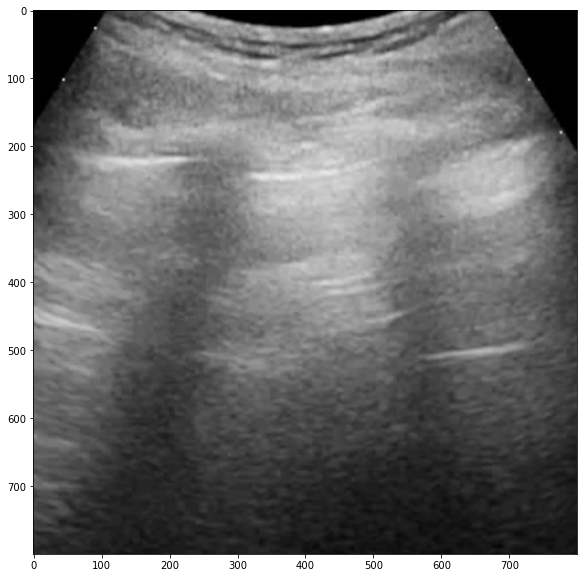

(144, 800, 800, 3)
output video size (800, 800)


In [47]:
base_path = "../../../data_pocovid/new_git_issues.nosync/"
vid = "raw/Reg_new_pregnant_vid1.avi"
cap = cv2.VideoCapture(os.path.join(base_path, vid))
arr = []
counter = 0
while True:
    ret, frame = cap.read()
    counter += 1
    if not ret:
        break
    if counter <2:
        plt.figure(figsize=(10,10))
        plt.imshow(frame[200:1000, 750:1550])
        plt.show()
        
    arr.append(frame[200:1000, 750:1550])
vid_arr = np.asarray(arr)
print(vid_arr.shape)
curr_size = vid_arr.shape[1:3]
print("output video size", curr_size)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter(
    os.path.join(base_path, "CReg_new_pregnant_vid1.avi"), fourcc,
    20.0, tuple(curr_size)
)
for x in vid_arr:
    writer.write(x.astype("uint8"))
writer.release()
# io.vwrite(os.path.join(base_path, "Cov_new_pregnant_vid8.mpeg"), arr, outputdict={"-vcodec":"mpeg2video"})
cap.release()

## Relevant for filling data table: Get framerate of videos

In [23]:
base_path = "../../data/Aujayeb_data/with_artifacts"
f_list = os.listdir(base_path)
print(f_list)

['Reg_Avi_Figure-1-showing-pleural-line-and-A-line.jpg', 'Reg_Avi_fIGURE-3-Consolidation-shred-sign-labelled.jpg', 'Reg_Avi_Figure-5-Right-lung-effusion-(white-star)-atelectatic-lung-(yellow-star)-and-diaphragm-(white-arrow).jpg', 'Reg_Avi_Figure-2-showing-multiple-B-lines.jpg']


In [27]:
for vid in f_list:
    if vid.startswith("Reg_Avi"):
        # # Code to rename files
        # new_fn = vid.replace(",", "")
        # new_fn = new_fn.replace(" ", "-")
        # shutil.move(os.path.join(base_path, vid), os.path.join(base_path, new_fn))
        cap = cv2.VideoCapture(os.path.join(base_path, vid))
        print(str(int(cap.get(3)))+"x"+str(int(cap.get(4))))
        # print(vid)
        # print(int(cap.get(7)))
        cap.release()

712x712
734x734
790x790
724x724


In [7]:
base_path = "../../../data_pocovid/new_git_issues.nosync/combatting_article"
f_list = os.listdir("../../../data_pocovid/new_git_issues.nosync/combatting_article")

In [30]:
data_table = pd.read_csv("../../data/pocovid_data.csv")
butterfly = data_table["Filename"].values
butterfly = [b for b in butterfly if "utterfly" in b]

In [33]:
import json
with open("../../data/data_from_butterfly.json", "w") as outfile:
    json.dump(butterfly, outfile)

# Images to video

In [5]:
from skvideo import io

In [34]:
path = "cleaned_data_videos/new_Marion/covid"
fn = "Cov-Butterfly-Irregular Pleura with Multip.mp4" # _frame0.jpg"
out_path = "cleaned_data_videos/cropped_data_manual_cleaned"


In [35]:
file_list = []
for frame in os.listdir(path):
    if frame.startswith(fn):
        file_list.append(os.path.join(path, frame))

In [36]:
# Define the codec and create VideoWriter object

arr = []
for frame in file_list:
    # ret, frame = cap.read()
    arr.append(cv2.imread(frame))
arr = np.array(arr)
# Release everything if job is finished
# cv2.destroyAllWindows()
arr.shape

(29, 1080, 1080, 3)

In [37]:
io.vwrite(os.path.join(out_path, fn[:-4]+".mpeg"), arr, outputdict={"-vcodec":"mpeg2video"})

# Video dataset - Previous version

In [ ]:
from tqdm import tqdm

In [5]:
import os
path='enter your path\'

#Train
videos_train=os.listdir(path+'train\\')
train = pd.DataFrame()
train['video_name'] = videos_train
train = train[:-1]

#Test
videos_test=os.listdir(path+'test\\')
test = pd.DataFrame()
test['video_name'] = videos_test
test = test[:-1]


In [4]:
# storing the frames from training videos
fn = "cleaned_data_videos/cropped_data_auto/Cov-clarius3.mp4"
count = 0
cap = cv2.VideoCapture(fn)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
num = cap.get(7)
x=1
print(frameRate, num)

cap.release()
    


25.0 295.0


In [5]:
25 * 12

300

In [82]:
# storing the frames from testing videos
for i in tqdm(range(test.shape[0])):
    count = 0
    videoFile = test['video_name'][i]
    cap = cv2.VideoCapture(path+'test\\'+videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named test_1
            filename =path+'test_1/' + videoFile +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.76it/s]


## 10 fold cross validation

In [3]:
import os
os.listdir("train")

['Pneu-Atlas-pneumonia2.gif',
 'Pneu-Atlas-pneumonia.gif',
 'Reg-Atlas-lungcurtain.gif',
 'Reg-Butterfly.mp4',
 'Cov-Atlas+(45).gif',
 'Cov-Butterfly-COVID Skip Lesion.mp4',
 'Reg-Youtube.mp4',
 'Pneu-grep-pneumonia4.mp4',
 'Pneu-grep-pneumonia1.mp4',
 'pneu-everyday.gif',
 'Cov-MSU-COVID Lung 2-Blines.mp4',
 'Pneu-grep-pneumonia2.mp4',
 'pneu-gred-6.gif',
 'Cov-Atlas+(44).gif',
 'Cov-clarius.gif',
 'Reg-bcpocus.gif',
 'Cov-Atlas-Day+4.gif',
 'Reg-Atlas.gif',
 'Cov-Butterfly-COVID Lung 2.mp4',
 'Reg-NormalLungs.mp4',
 'pneu-radiopaeda.mp4',
 'Cov-Atlas-Day+2.gif',
 'Cov-grepmed-blines-pocus-.mp4',
 'Cov-grepmed3.mp4',
 'Cov-grepmed2.mp4']

In [4]:
os.listdir("test")

['Reg-Grep-Normal.gif',
 'Cov-Atlas-+(43).gif',
 'Cov-B_ConvexProb_score1.jpg',
 'Cov-C_Convex_Prob_score2.jpg',
 'Reg-nephropocus.mp4',
 'Cov-D_Convex_Prob_score3.jpg',
 'pneu-gred-7.gif',
 'Pneu-Atlas-pneumonia-AirBronch.gif',
 'Pneu-grep-pneumonia3.mp4',
 'Reg-Grep-Alines.mp4',
 'Cov-MSU-SkipLesions.mp4',
 'Cov-C_ConvexProb_score3.jpg',
 'Reg-Atlas-alines.gif',
 'Cov-Butterfly-COVID Lung 1.mp4',
 'Cov-Atlas-Day+1.gif',
 'Cov-Atlas-Day+3.gif']